# Number recognition with MINST and CNN

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

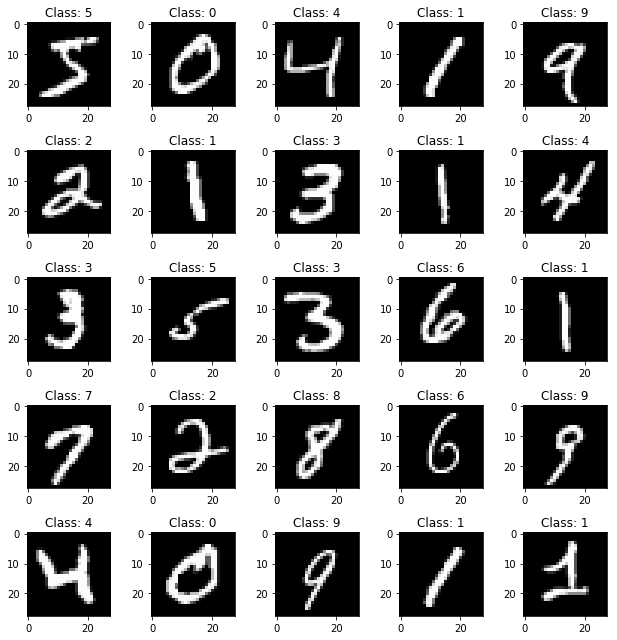

In [3]:
plt.figure(figsize=(9,9))
for idx in range(25):
  plt.subplot(5,5, idx+1)
  plt.imshow(X_train[idx], cmap='gray')
  plt.title('Class: {}'.format(Y_train[idx]))
  
  plt.tight_layout()

In [4]:
X_train.shape

(60000, 28, 28)

In [0]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

In [6]:
X_train.shape, X_test.shape, input_shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (28, 28, 1))

In [0]:
if np.max(X_train) >1: X_train = X_train / 255
if np.max(X_test) >1: X_test = X_test / 255

In [13]:
if len(Y_train.shape)==1:
  num_classes = len(set(Y_train))
  Y_train = to_categorical(Y_train, num_classes)
  Y_test = to_categorical(Y_test, num_classes)

Y_train.shape

(60000, 10)

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(
  X_train, Y_train,
  batch_size=128,
  epochs=3,
  validation_data=(X_test,Y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 75s 1ms/step - loss: 0.1666 - acc: 0.9510 - val_loss: 0.0491 - val_acc: 0.9841
Epoch 2/3
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0448 - acc: 0.9857 - val_loss: 0.0317 - val_acc: 0.9895
Epoch 3/3
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0380 - val_acc: 0.9870


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [20]:
score

[0.03796456227626768, 0.987]